- Визуализация стрельбы в Далласе с акцентом на сюжеты
- будем считывать данные из базы данных и объединять их в более широкие наборы данных
- изучим идеи, чтобы визуализировать это и создать карту со съемками

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = sqlite3.connect('dallas-ois_1.sqlite')

- База данных состоит из 3х таблиц: `incidents`, `officers`, `subjects`

In [3]:
incidents = pd.read_sql('SELECT * FROM incidents', data)
officers = pd.read_sql('SELECT * FROM officers', data)
subjects = pd.read_sql('SELECT * FROM subjects', data)

In [4]:
len(incidents),len(officers),len(subjects)

(219, 370, 223)

In [5]:
incidents.head()

,case_number,date,location,subject_statuses,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,2013-02-23,3000 Chihuahua Street,Injured,Handgun,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
1,121982X,2010-05-03,1300 N. Munger Boulevard,Injured,Handgun,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN
2,605484T,2007-08-12,200 S. Stemmons Freeway,Other,Shotgun,"Salinas, Nick L/M",1,"Poston, Jerry W/M",1,See Summary,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Sunday, August 12, 2007, at approximately 2...",NaN,NaN
3,384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,Unarmed,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN
4,244659R,2006-04-03,6512 South Loop 12,Injured,Hands,"Watkins, Caleb B/M",1,"Armstrong, Michael W/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, April 3, 2006, at approximately 11:...",NaN,NaN


обьединим таблицу `subjects` и `incidents` 

In [6]:
subject_incidents = pd.read_sql("SELECT * FROM subjects JOIN incidents ON subjects.case_number = incidents.case_number ", data)

In [7]:
subject_incidents.head()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,...,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,L,M,Curry,James,"Curry, James",44523A,2013-02-23,3000 Chihuahua Street,Injured,...,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
1,121982X,L,M,Chavez,Gabriel,"Chavez, Gabriel",121982X,2010-05-03,1300 N. Munger Boulevard,Injured,...,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN
2,605484T,L,M,Salinas,Nick,"Salinas, Nick",605484T,2007-08-12,200 S. Stemmons Freeway,Other,...,"Salinas, Nick L/M",1,"Poston, Jerry W/M",1,See Summary,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Sunday, August 12, 2007, at approximately 2...",NaN,NaN
3,384832T,B,M,Smith,James,"Smith, James",384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN
4,384832T,B,M,Dews,Antonio,"Dews, Antonio",384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN


In [8]:
len(subject_incidents)

223

In [9]:
subject_incidents.dtypes

case_number                    object
race                           object
gender                         object
last_name                      object
first_name                     object
full_name                      object
case_number                    object
date                           object
location                       object
subject_statuses               object
subject_weapon                 object
subjects                       object
subject_count                   int64
officers                       object
officer_count                   int64
grand_jury_disposition         object
attorney_general_forms_url     object
summary_url                    object
summary_text                   object
latitude                      float64
longitude                     float64
dtype: object

посмотрим на нулевые значения

In [11]:
subject_incidents.isna().sum()

case_number                     0
race                            0
gender                          0
last_name                       0
first_name                     18
full_name                       0
case_number                     0
date                            0
location                        0
subject_statuses                0
subject_weapon                  0
subjects                        0
subject_count                   0
officers                        0
officer_count                   0
grand_jury_disposition         88
attorney_general_forms_url    221
summary_url                     3
summary_text                    3
latitude                        9
longitude                       9
dtype: int64

В рамках поиска полезных функций давайте рассмотрим subject_statuses

In [10]:
subject_incidents.groupby('subject_statuses').count()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
subject_statuses,,,,,,,,,,,,,,,,,,,,
1 Deceased 1 Injured,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2
2 Injured,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
Deceased,69,69,69,69,67,69,69,69,69,69,69,69,69,69,67,1,67,67,68,68
Deceased Injured,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2
Injured,60,60,60,60,60,60,60,60,60,60,60,60,60,60,58,1,60,60,57,57
Other,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0,2,2,1,1
Shoot and Miss,87,87,87,87,71,87,87,87,87,87,87,87,87,87,4,0,86,86,83,83


In [11]:
subject_incidents.groupby('race').count()

,case_number,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
race,,,,,,,,,,,,,,,,,,,,
A,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,2,2,2,2
B,111,111,111,104,111,111,111,111,111,111,111,111,111,111,67,0,109,109,106,106
L,72,72,72,61,72,72,72,72,72,72,72,72,72,72,37,2,71,71,68,68
W,38,38,38,38,38,38,38,38,38,38,38,38,38,38,31,0,38,38,38,38


In [12]:
subject_incidents.groupby('gender').count()

,case_number,race,last_name,first_name,full_name,case_number,date,location,subject_statuses,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
gender,,,,,,,,,,,,,,,,,,,,
F,8,8,8,7,8,8,8,8,8,8,8,8,8,8,5,0,8,8,8,8
M,215,215,215,198,215,215,215,215,215,215,215,215,215,215,130,2,212,212,206,206


хотим - наглядный сюжет инцидента со стрельбой

построить график на основе долготы и широты.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

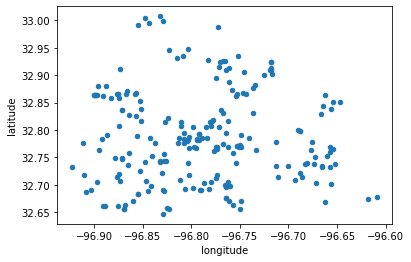

In [13]:
subject_incidents.plot.scatter(x='longitude', y='latitude')

In [14]:
dataset = subject_incidents[['race', 'subject_statuses', 'latitude', 'longitude']].dropna()

In [15]:
len(dataset)

214

## Как визуализировать
- два объекта: `race` и `subject_statuses`
- Один из способов визуализации данных - это цвет и размер.
- Идея:
  - Сопоставьте особенности гонки с цветами
  - Сопоставьте subject_statuses с размером

использую apply для соединения race и цветов(сопоставляя каждому из типов race)

In [16]:
mapping = {'B': 'blue', 'W': 'yellow', 'A': 'red', 'L': 'cyan'}

In [17]:
dataset['race'] = dataset['race'].apply(lambda x: mapping[x])

In [18]:
dataset.head()

,race,subject_statuses,latitude,longitude
9,cyan,Deceased,32.68642,-96.908674
10,blue,Deceased,32.86400,-96.898998
11,yellow,Shoot and Miss,32.81482,-96.826787
12,blue,Injured,32.77540,-96.767489
13,blue,Shoot and Miss,32.74417,-96.828470


В subject_statuses следующие категории: 
- `1 Deceased 1 Injured`, `2 Injured`, `Deceased`, `Deceased Injured`, `Injured`, `Other`, `Shoot and Miss`

Основные категории:`Deceased`, `Injured`, `Shoot and Miss`

In [19]:
mapping_2 = {'Deceased': 1000, 'Injured': 500, 'Shoot and Miss': 250}

In [20]:
dataset['subject_statuses'] = dataset['subject_statuses'].apply(lambda x: mapping_2.get(x, 100))
dataset.head()

,race,subject_statuses,latitude,longitude
9,cyan,1000,32.68642,-96.908674
10,blue,1000,32.86400,-96.898998
11,yellow,250,32.81482,-96.826787
12,blue,500,32.77540,-96.767489
13,blue,250,32.74417,-96.828470


Теперь можем визуализировать данные.

Это можно сделать с помощью точечной диаграммы

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

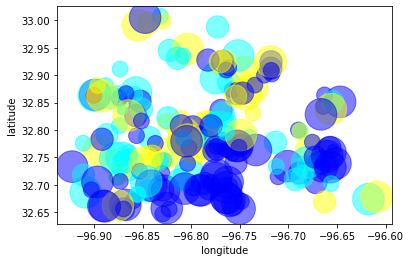

In [21]:
dataset.plot.scatter(x='longitude', y='latitude', s='subject_statuses', c='race', alpha=.5)

очень красивоДалее, чтобы увидеть карту в гитхаб, перейдите в github.dev

In [22]:
!pip install folium

In [23]:
import folium

m = folium.Map(location=[32.8, -96.8])
m

In [24]:
for _, row in dataset.iterrows():
    folium.CircleMarker(
    location=[row['latitude'], row['longitude']],
    radius=row['subject_statuses']//100,
    color=row['race'],
    fill=True,
    fill_color=row['race']
).add_to(m)

In [25]:
m